<a href="https://colab.research.google.com/github/danielasberna/danielasberna/blob/main/Pratique_M18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv("/content/drive/MyDrive/ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Valor_Aluguel     7203 non-null   int64
 1   Valor_Condominio  7203 non-null   int64
 2   Metragem          7203 non-null   int64
 3   N_Quartos         7203 non-null   int64
 4   N_banheiros       7203 non-null   int64
 5   N_Suites          7203 non-null   int64
 6   N_Vagas           7203 non-null   int64
dtypes: int64(7)
memory usage: 394.0 KB


In [6]:
df.isnull().sum()

,0
Valor_Aluguel,0
Valor_Condominio,0
Metragem,0
N_Quartos,0
N_banheiros,0
N_Suites,0
N_Vagas,0


In [7]:
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000
mean,2966.596140,811.538109,88.506178,2.300153,2.095932,1.016660,1.44176
std,2948.720385,796.564846,61.567505,0.826615,0.983812,0.874204,0.86993
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000
75%,3200.000000,980.000000,100.000000,3.000000,2.000000,1.000000,2.00000
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.00000


In [ ]:
#Não existem outliers pois nesse exemplo de tabela de dados é normal alguns valores serem maiores do que o comum.

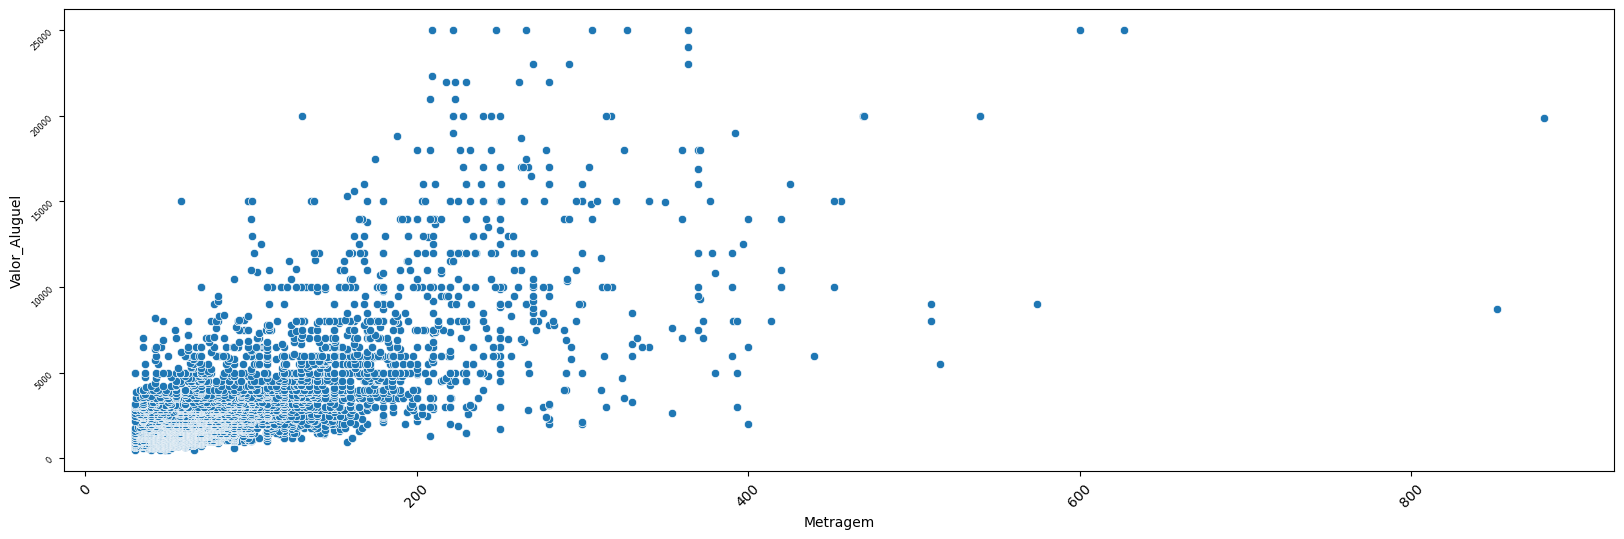

In [8]:
#Análise bivariada
plt.figure(figsize=(20, 6))
sns.scatterplot(x='Metragem', y='Valor_Aluguel', data=df)
plt.xticks(rotation=45)
plt.yticks(rotation=45, fontsize=6)
plt.show()
# Insight = O valor do aluguel tende a crescer de acordo com a metragem

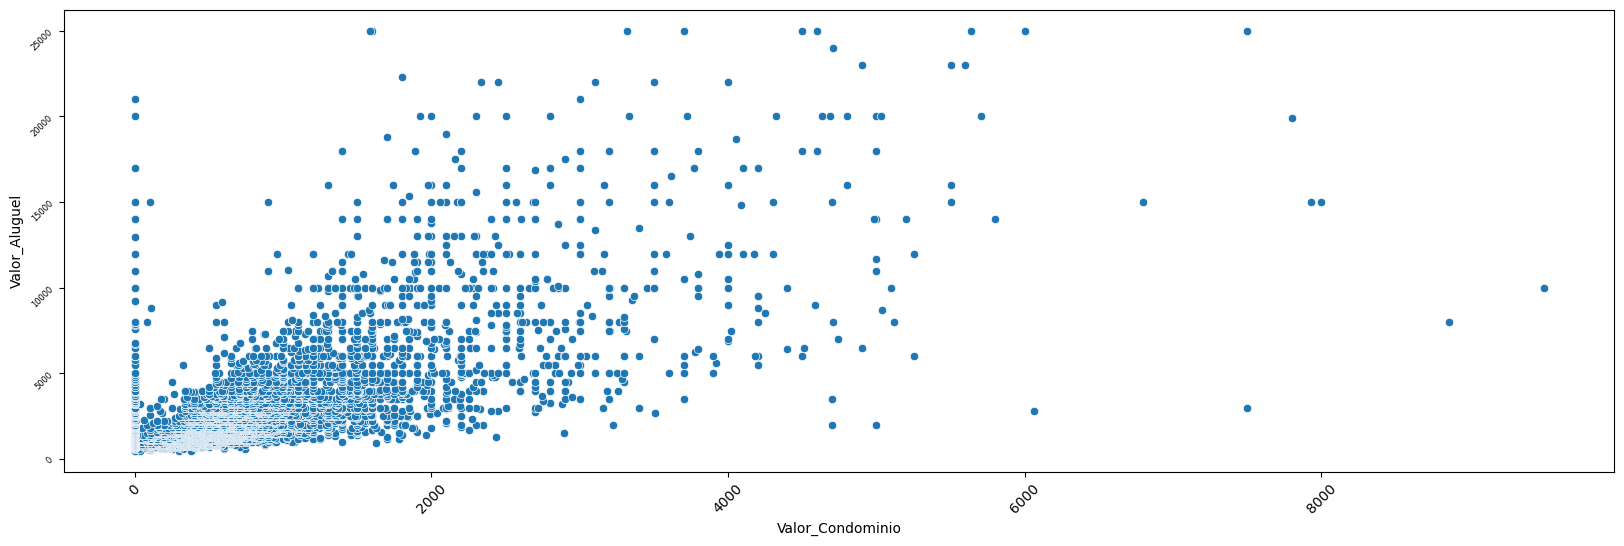

In [9]:
#Análise bivariada
plt.figure(figsize=(20, 6))
sns.scatterplot(x='Valor_Condominio', y='Valor_Aluguel', data=df)
plt.xticks(rotation=45)
plt.yticks(rotation=45, fontsize=6)
plt.show()
# Insight = O valor do condominio se mantem relativamente padrão

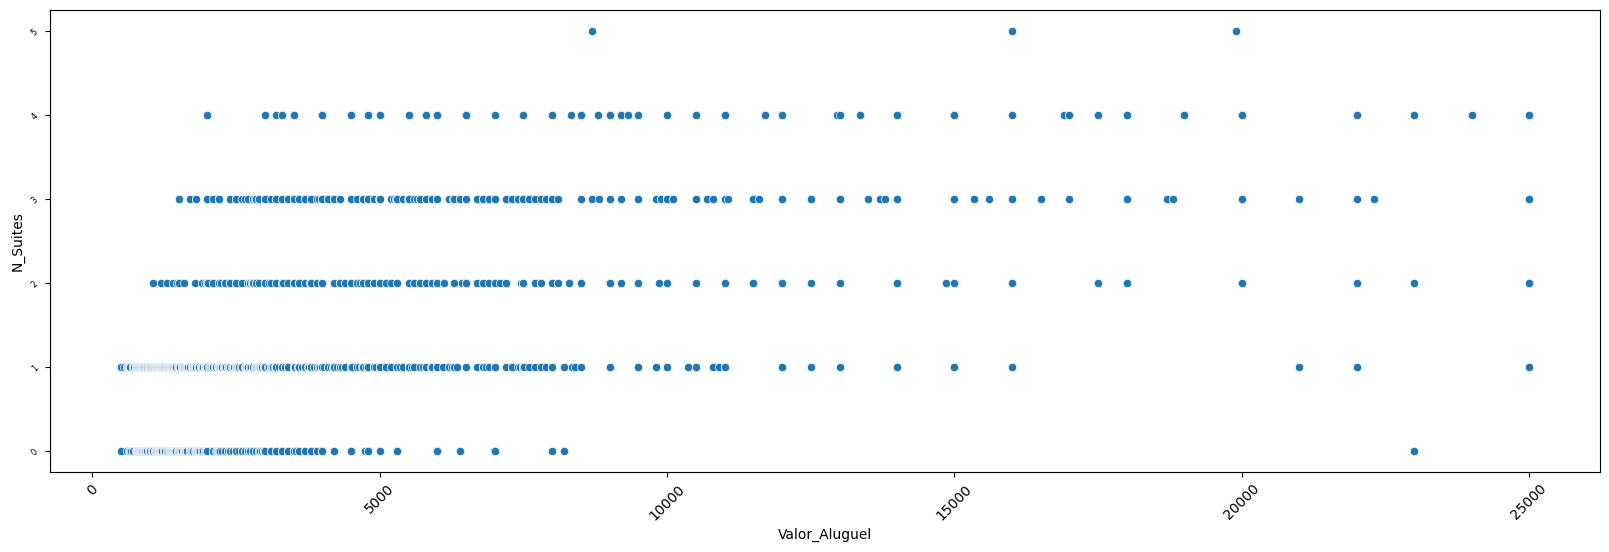

In [10]:
#Análise bivariada
plt.figure(figsize=(20, 6))
sns.scatterplot(x='Valor_Aluguel', y='N_Suites', data=df)
plt.xticks(rotation=45)
plt.yticks(rotation=45, fontsize=6)
plt.show()
# Insight = Não há tendência clara exposta aqui

In [11]:
correlation_matrix = df.corr()
display(correlation_matrix)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
Valor_Aluguel,1.000000,0.695302,0.730591,0.413139,0.603715,0.614397,0.652858
Valor_Condominio,0.695302,1.000000,0.805926,0.497420,0.585795,0.589244,0.690993
Metragem,0.730591,0.805926,1.000000,0.678091,0.687558,0.696281,0.743872
N_Quartos,0.413139,0.497420,0.678091,1.000000,0.553807,0.540887,0.591224
N_banheiros,0.603715,0.585795,0.687558,0.553807,1.000000,0.920149,0.694983
N_Suites,0.614397,0.589244,0.696281,0.540887,0.920149,1.000000,0.712054
N_Vagas,0.652858,0.690993,0.743872,0.591224,0.694983,0.712054,1.000000


Uma forte correlação encontrada é a de Valor_Condominio e Metragem, Valor_Aluguel e Metragem, Valor_Condominio e N_Vagas etc.

In [13]:
X = df.drop('Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X = X_train[['Metragem']]  # Variável independente (características)
y = y_train  # Variável dependente (rótulo)

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [19]:
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: -96.99896039931718
Coefficient: 34.47397089324867


Equação da reta:
Valor_Aluguel = (Metragem * 34.47) - 96.99

In [23]:
r_squared = model.score(X_train[['Metragem']], y_train)
print(f"R^2: {r_squared}")

R^2: 0.521363231851778


O resultado significa que aproximadamente 52,14% da variação no preço do aluguel pode ser explicada pela metragem quadrada do imóvel. Um R-quadrado de 0,5214 sugere que a metragem quadrada é um preditor consideravelmente bom do preço do aluguel, mas existem outros fatores não incluídos neste modelo simples que também influenciam o preço. É necessário um modelo mais preciso para melhor análise.

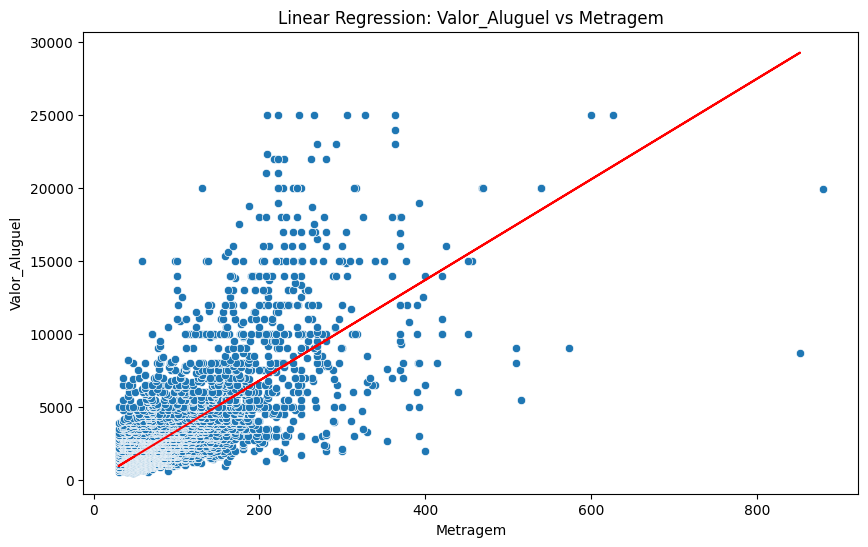

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Metragem', y='Valor_Aluguel', data=df)
plt.plot(X_train['Metragem'], model.predict(X_train[['Metragem']]), color='red')
plt.xlabel('Metragem')
plt.ylabel('Valor_Aluguel')
plt.title('Linear Regression: Valor_Aluguel vs Metragem')
plt.show()

Insight = Existe uma variação significativa nos preços de aluguel que não pode ser explicada apenas pela metragem quadrada. Isso sugere que outras características ou fatores não incluídos neste modelo simples desempenham um papel importante na determinação do preço do aluguel.

In [27]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes = model.predict(X_test[['Metragem']])

# Avaliando o desempenho do modelo usando métricas como o R²
r2 = model.score(X_test[['Metragem']], y_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)

Coeficiente de Determinação (R²) nos Dados de Teste: 0.5697993791211697


Os valores semelhantes de R-quadrado entre os conjuntos de treinamento e teste sugerem que o modelo não está sobreajustado(overfitting). No entanto, como ambos os valores estão em torno de 0,5, isso indica que a "Metragem" por si só não é um forte preditor do preço do aluguel, e outros fatores influenciam significativamente o preço. Para melhorar o poder preditivo do modelo, você pode considerar incluir mais recursos ou tentar um modelo mais complexo.

In [29]:
# Variáveis independentes (X) e dependente (y)
X = df[['N_Vagas', 'N_Quartos', 'N_Suites','N_banheiros','Metragem','Valor_Condominio']]
y = df['Valor_Aluguel']

# Criando e treinando o modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Coeficientes e intercepto
print("Intercepto:", modelo.intercept_)
print("Coeficientes:", modelo.coef_)

Intercepto: 345.21092995248455
Coeficientes: [ 557.69025335 -651.15175248  300.5291752   232.19226073   20.99640136
    0.81890372]


In [30]:
# Create and train the multiple linear regression model using training data
modelo_multiplo = LinearRegression()
modelo_multiplo.fit(X_train, y_train)

# Display the intercept and coefficients
print("Intercepto (Modelo Múltiplo):", modelo_multiplo.intercept_)
print("Coeficientes (Modelo Múltiplo):", modelo_multiplo.coef_)

Intercepto (Modelo Múltiplo): 435.29273156066256
Coeficientes (Modelo Múltiplo): [   0.78400678   20.68135689 -649.12188657  223.71153486  340.33788484
  501.24631769]


In [32]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes = modelo_multiplo.predict(X_test)

# Avaliando o desempenho do modelo usando métricas como o R²
r2 = modelo_multiplo.score(X_test, y_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)

Coeficiente de Determinação (R²) nos Dados de Teste: 0.6400782589585374


O modelo de regressão múltipla é a melhor opção. Isso se dá porque ele avalia todas as variáveis independentes, ao invés de avaliar apenas uma.
